In [1]:
%matplotlib inline

# EDA

--------------

## Carga de librerías

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import random
from sklearn.model_selection import train_test_split

--------------

## Data files

In [3]:
os.listdir('.')

['.git', '.gitignore', '01 EDA.ipynb', 'README.md']

In [4]:
DATA_PATH = '../data'
os.listdir(DATA_PATH)

['jpeg', 'jpeg224', 'sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
train_csv = pd.read_csv(f'{DATA_PATH}/train.csv')
train_csv.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [6]:
imgs_train_224 = os.listdir(f'{DATA_PATH}/jpeg224/train')
imgs_train = os.listdir(f'{DATA_PATH}/jpeg/train')

imgs_train_224[:3]

['ISIC_0015719.jpg', 'ISIC_0052212.jpg', 'ISIC_0068279.jpg']

In [7]:
test_csv = pd.read_csv(f'{DATA_PATH}/test.csv')
test_csv.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [8]:
imgs_test_224 = os.listdir(f'{DATA_PATH}/jpeg224/test')
imgs_test = os.listdir(f'{DATA_PATH}/jpeg/test')

imgs_test_224[:3]

['ISIC_0052060.jpg', 'ISIC_0052349.jpg', 'ISIC_0058510.jpg']

--------------

## Sample submision file

In [9]:
submision_csv = pd.read_csv(f'{DATA_PATH}/sample_submission.csv')
submision_csv.head()

,image_name,target
0,ISIC_0052060,0
1,ISIC_0052349,0
2,ISIC_0058510,0
3,ISIC_0073313,0
4,ISIC_0073502,0


--------------

## Images

<function matplotlib.pyplot.show(close=None, block=None)>

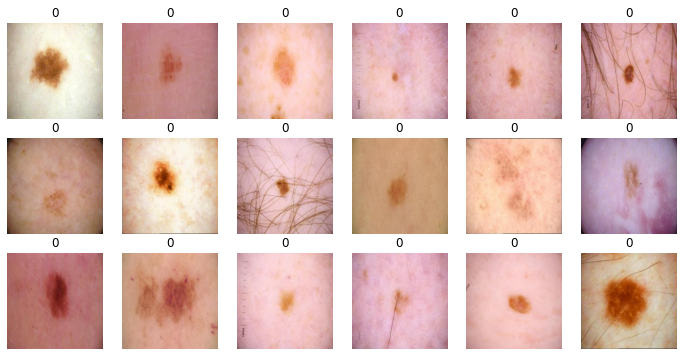

In [10]:
row, col = 3, 6
fig = plt.figure(figsize=(2*col, 2*row))
for r in range(row):
    for c in range(col):
        plt.subplot(row, col, r*col+c+1)
        idx = random.randint(0, len(imgs_train)-1)
        name = train_csv['image_name'].values[idx]
        img = io.imread(f'{DATA_PATH}/jpeg224/train/{name}.jpg')
        plt.imshow(img)
        plt.axis(False)
        label = train_csv['target'].values[idx]
        plt.title(label)
plt.show

--------------

## Distribución de clases

<AxesSubplot:>

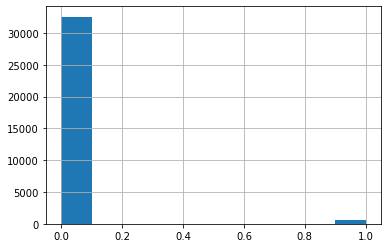

In [11]:
train_csv['target'].hist()

In [12]:
(ceros, ones) = train_csv['target'].value_counts()
total = ceros + ones

print(f"Hay un {ceros*100/total}% de ceros")
print(f"Hay un {ones*100/total}% de unos")

Hay un 98.23703435367989% de ceros
Hay un 1.762965646320111% de unos


<AxesSubplot:>

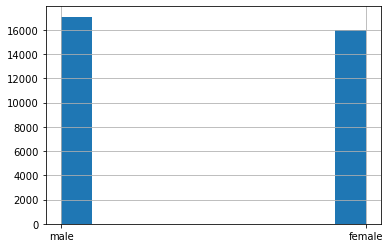

In [13]:
train_csv['sex'].hist()

<AxesSubplot:>

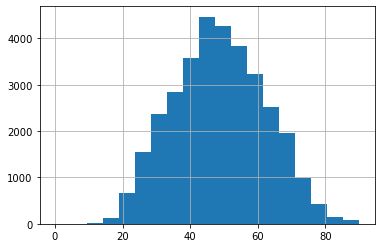

In [14]:
train_csv['age_approx'].hist(bins=len(train_csv['age_approx'].unique()))

<AxesSubplot:>

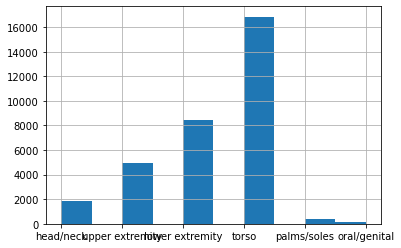

In [15]:
train_csv['anatom_site_general_challenge'].hist()

In [18]:
train_csv.shape, test_csv.shape

((33126, 8), (10982, 5))

--------------

## Subsets

In [20]:
train_split, val_split = train_test_split(train_csv, test_size=0.33, shuffle=True, random_state=42, stratify=train_csv['target'])
train_split.shape, val_split.shape

((22194, 8), (10932, 8))

In [22]:
train_split.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
20225,ISIC_6147712,IP_8210115,male,55.0,torso,unknown,benign,0
27960,ISIC_8460669,IP_1246698,female,40.0,lower extremity,unknown,benign,0
10600,ISIC_3272999,IP_3512888,female,35.0,torso,nevus,benign,0
7020,ISIC_2195125,IP_4576977,male,45.0,torso,unknown,benign,0
28270,ISIC_8557006,IP_2950485,female,40.0,lower extremity,unknown,benign,0


<AxesSubplot:>

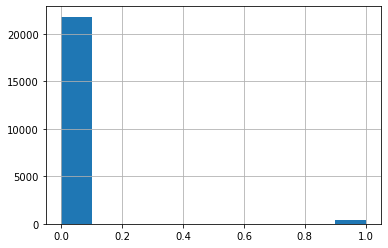

In [25]:
train_split['target'].hist()

<AxesSubplot:>

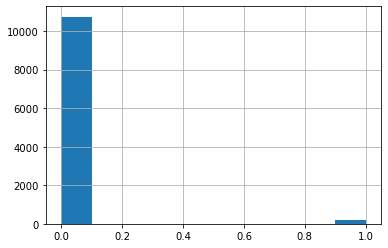

In [26]:
val_split['target'].hist()

In [29]:
_, subset = train_test_split(train_split, test_size=0.1, shuffle=True, random_state=42, stratify=train_split['target'])
subset.shape

(2220, 8)

--------------

## CSVs

In [30]:
train_split.to_csv(f'{DATA_PATH}/train_split.csv', index=False)
val_split.to_csv(f'{DATA_PATH}/val_split.csv', index=False)
subset.to_csv(f'{DATA_PATH}/subset.csv', index=False)

In [31]:
os.listdir(DATA_PATH)

['jpeg',
 'jpeg224',
 'sample_submission.csv',
 'subset.csv',
 'test.csv',
 'train.csv',
 'train_split.csv',
 'val_split.csv']

--------------